# AI Project: Employee Attrition Prediction - **source code**

## Table of Contents
- [Framework](#framework)
- [Initial dataset](#initial-dataset)
- [Ethic](#ethic)
- [Data wrangling](#data-wrangling)
- [Model](#model)
  - [Implementation](#implementation)
  - [Quality indicators](#quality-indicators)
  - [Graph and observation](#graph-and-observation)


## Framework

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

sns.set(style='whitegrid')

## Initial dataset

The dataset for this project was provided by the Human Resources department of **HumanForYou**. It contains information for approximately 4,410 employees as of 2015. The primary objective is to analyze the factors influencing the 15% attrition rate observed in 2016.

The data is distributed across five main files, linked by a unique identifier: **EmployeeID**.

#### 1. General Human Resources Data (`general_data.csv`)
This is the core dataset containing demographic and professional profiles:
* **Demographics:** Age, Gender, Marital Status, Education level (1-5), and Education Field.
* **Work Profile:** Job Role, Job Level, Monthly Income, Distance From Home (km), Total Working Years, and Years at Company.
* **Compensation & Career:** Percentage Salary Hike, Years Since Last Promotion, and Stock Option Level.
* **Target Variable:** **Attrition** (Whether the employee left the company during 2016).

#### 2. Manager Assessment Survey (`manager_survey_data.csv`)
Latest performance evaluations conducted by managers in February 2015:
* **JobInvolvement:** Level of employee involvement (1: Low to 4: Very High).
* **PerformanceRating:** Annual performance rating (1: Low to 4: Beyond Expectations).

#### 3. Workplace Quality of Life Survey (`employee_survey_data.csv`)
Feedback collected from employees in June 2015:
* **EnvironmentSatisfaction & JobSatisfaction:** Rated from 1 (Low) to 4 (Very High).
* **WorkLifeBalance:** Rating of their work-life balance (1: Poor to 4: Excellent).

#### 4. Working Hours Data (`in_time.csv` & `out_time.csv`)
Raw data from time clocks recording daily arrival and departure times for the entire year of 2015. 
*Derived feature:* These logs are used to calculate **Average Working Hours**, a critical indicator of potential burnout.

#### 5. Feature Summary Table
| Group | Key Features |
| :--- | :--- |
| **Personal** | Age, Distance From Home, Education, Marital Status |
| **Experience** | Num Companies Worked, Total Working Years, Seniority |
| **Financial** | Monthly Income, Salary Hike, Stock Options |
| **Satisfaction** | Environment, Job Satisfaction, Work-Life Balance |
| **Performance** | Manager Ratings, Job Involvement |

## Ethic

The Indian pharmaceutical company **HumanForYou** has a high employee turnover rate of about 15% each year. This project's goal is to pinpoint the causes of attrition and offer practical suggestions for enhancing staff retention. Ensuring the project is carried out responsibly is essential when utilizing data analytics and AI tools. In accordance with the European Commission's AI ethics, this document describes the ethical approach used.

#### 1. Respect for Human Autonomy
**Principle:** Upholding employees’ rights, freedom of choice, and dignity.

* **Anonymization:** All employee data has been anonymized via `EmployeeID`, ensuring individual identities are protected.
* **Feature Selection:** The project team deliberately removed variables such as **marital status** and **age** from the analysis. This reduces the risk of stakeholders consciously or unconsciously targeting specific demographic groups.
* **Voluntary Participation:** Employee survey data (Workplace Quality of Life Survey) was collected voluntarily. Participation is never coerced, and employees can abstain without repercussions.
* **Goal:** The models aim to support management in understanding attrition, not to target individuals.

#### 2. Technical Robustness and Security
**Principle:** Minimizing harm caused by system errors or biases.

* **Data Integrity:** Missing values, inconsistencies, and outliers are handled using **standardized imputation techniques** to reduce inaccurate predictions.
* **Validation:** Multiple models are tested with **cross-validation** to prevent overfitting and ensure stable, generalizable predictions.
* **Data Protection:** All data is stored on secure, access-controlled servers. Backups and encryption protocols protect against unauthorized access.

#### 3. Data Privacy and Governance
* **Traceability:** `EmployeeID` replaces personal identifiers to prevent traceability to real individuals.
* **Access Control:** Only authorized team members access the datasets. Access logs are maintained for transparency.
* **Compliance:** Data handling fully complies with the EU's **General Data Protection Regulation (GDPR)**.

#### 4. Transparency
**Principle:** Stakeholders must understand how models work and how decisions are made.

* **Documentation:** Every preprocessing step, modeling choice, and analytical assumption is fully documented.
* **Communication:** Reports are written in **clear, non-technical language** to allow HR managers to interpret insights correctly without needing a data science background.

#### 5. Diversity, Non-discrimination and Fairness
* **Bias Mitigation:** AI models may unintentionally reinforce bias. We examine potential bias against gender, age, or educational attainment.
* **Correction:** Disparities are measured; if needed, mitigating techniques (such as **reweighting** and **fair sampling**) are implemented to correct unfair outcomes.

#### 6. Environmental and Societal Well-being
* **Work-Life Balance:** Insights aim to improve job satisfaction and training opportunities.
* **Sustainability:** By preventing avoidable turnover, companies cut recruitment costs and environmental impacts (e.g., reducing the production of branded mugs, T-shirts, and paper handbooks for new joins).

#### 7. Accountability
* **Traceability:** Responsibilities are clearly assigned to specific team members for data handling, preprocessing, and modeling.
* **Responsibility:** Stakeholders are held responsible for the actions and outcomes of the AI system.

#### Conclusion
The **HumanForYou** employee turnover project adheres to high ethical standards across data privacy, fairness, transparency, and accountability. By combining anonymized datasets, voluntary surveys, and robust modeling, the project supports HR decision-making without compromising employee autonomy or rights.

#### References
1. [EU Ethics Guidelines for Trustworthy AI](https://digital-strategy.ec.europa.eu/en/library/ethics-guidelines-trustworthy-ai)
2. [Big Data, Artificial Intelligence, and Ethics (Sage Journals)](https://journals.sagepub.com/doi/full/10.1177/2053951716679679)

## Data wrangling

### Data importation

In [2]:
# Load data
general_df = pd.read_csv(os.path.join('data','general_data.csv'))
manager_survey_df = pd.read_csv(os.path.join('data', 'manager_survey_data.csv'))
employee_survey_df = pd.read_csv(os.path.join('data', 'employee_survey_data.csv'))
in_time = pd.read_csv(os.path.join('data', 'in_time.csv'))
out_time = pd.read_csv(os.path.join('data', 'out_time.csv'))

### Data observation before wrangling

In [3]:
# Check initial data sizes
print(f"General Data: {general_df.shape} (rows, columns)")
print(f"Manager Survey: {manager_survey_df.shape}")
print(f"Employee Survey: {employee_survey_df.shape}")


print("\n===========================================================\n")


# Check if EmployeeID has duplicates
if general_df['EmployeeID'].duplicated().sum() == 0:
    print("EmployeeID is unique")
else:
    print("Warning")


print("\n===========================================================\n")


# Merge data
merge_df = pd.merge(general_df, manager_survey_df, on='EmployeeID', how='left')
final_df = pd.merge(merge_df, employee_survey_df, on='EmployeeID', how='left')

print(f"Size of Final Table: {final_df.shape}")


print("\n===========================================================\n")


print(f"First 5 rows:")
display(final_df.head())

General Data: (4410, 24) (rows, columns)
Manager Survey: (4410, 3)
Employee Survey: (4410, 4)


EmployeeID is unique


Size of Final Table: (4410, 29)


First 5 rows:


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


In [4]:
# Check initial data sizes
print(f"In time: {in_time.shape} (rows, columns)")
print(f"Out time: {out_time.shape}")

# Rename first column to 'EmployeeID' for consistency
in_time.rename(columns={in_time.columns[0]: 'EmployeeID'}, inplace=True)
out_time.rename(columns={out_time.columns[0]: 'EmployeeID'}, inplace=True)

# Set 'EmployeeID' as index
in_time.set_index('EmployeeID', inplace=True)
out_time.set_index('EmployeeID', inplace=True)

# Change data into datetime. errors='coerce' if (NaT)
in_time_df = in_time.apply(pd.to_datetime, errors='coerce')
out_time_df = out_time.apply(pd.to_datetime, errors='coerce')

# Calculate working time
working_time = out_time_df - in_time_df
display(working_time.head())


print("\n===========================================================\n")


# Check average working time
average_working_time = working_time.mean(axis=1)
avg_working_hours_numeric = average_working_time.apply(lambda x: x.total_seconds() / 3600)
display(avg_working_hours_numeric.head())


print("\n===========================================================\n")


# Reset index to turn Series into DataFrame
time_features_df = avg_working_hours_numeric.reset_index()
# Rename columns
time_features_df.columns = ['EmployeeID', 'AvgWorkingHours']
# Display final time features DataFrame
display(time_features_df.head())


print("\n===========================================================\n")


# Merge time features back to final_df
final_df = pd.merge(final_df, time_features_df, on='EmployeeID', how='left')
# Check final data sizes
print(f"Final DataFrame: {final_df.shape} (rows, columns)")


print("\n===========================================================\n")


print("First 5 rows of final DataFrame:")
display(final_df.head())

In time: (4410, 262) (rows, columns)
Out time: (4410, 262)


,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,NaT,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,NaT,...,NaT,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,NaT,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
2,NaT,0 days 08:06:33,0 days 07:27:17,NaT,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,NaT,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,NaT,NaT,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
3,NaT,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,NaT,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,NaT,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
4,NaT,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,NaT,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,NaT,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
5,NaT,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,NaT,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,NaT,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


EmployeeID
1    7.373651
2    7.718969
3    7.013240
4    7.193678
5    8.006175
dtype: float64

,EmployeeID,AvgWorkingHours
0,1,7.373651
1,2,7.718969
2,3,7.013240
3,4,7.193678
4,5,8.006175




Final DataFrame: (4410, 30) (rows, columns)


First 5 rows of final DataFrame:


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AvgWorkingHours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3,3,3.0,4.0,2.0,7.373651
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,2,4,3.0,2.0,4.0,7.718969
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,3,3,2.0,2.0,1.0,7.013240
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,2,3,4.0,4.0,3.0,7.193678
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,3,3,4.0,1.0,3.0,8.006175


### Data cleaning

In [5]:
# Delete unneeded columns
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']
final_df.drop(columns=columns_to_drop, inplace=True)

# Handle missing values
numeric_columns = final_df.select_dtypes(include=[np.number]).columns
final_df[numeric_columns] = final_df[numeric_columns].fillna(final_df[numeric_columns].mean())

missing_values = final_df.isnull().sum()
print(missing_values)


print("\n===========================================================\n")


# Label encoding 
attrition_map = {'Yes': 1, 'No': 0}
final_df['Attrition'] = final_df['Attrition'].map(attrition_map)
gender_map = {'Male': 1, 'Female': 0}
final_df['Gender'] = final_df['Gender'].map(gender_map)
travel_map = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}
final_df['BusinessTravel'] = final_df['BusinessTravel'].map(travel_map)
if 'MaritalStatus_Married' in final_df.columns:
    final_df.rename(columns={'MaritalStatus_Married': 'Married'}, inplace=True)

if 'MaritalStatus_Single' in final_df.columns:
    final_df.drop(columns=['MaritalStatus_Single'], inplace=True)

# One-hot encoding
categorical_columns = final_df.select_dtypes(include=['object']).columns
final_df = pd.get_dummies(final_df, columns=categorical_columns, drop_first=True)
final_df = final_df.replace({True: 1, False: 0})
print(final_df.info())
print("\n===========================================================\n")
print("First 5 rows after encoding:")
print("\n")
display(final_df.head())

print("\n===========================================================\n")

print(final_df.info())

# Standard data
final_df_scalled = final_df.copy()

scatter = StandardScaler()
final_df_scalled[numeric_columns] = scatter.fit_transform(final_df[numeric_columns])

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
AvgWorkingHours            0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                    

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26004\3991040890.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df = final_df.replace({True: 1, False: 0})


,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,1,6,2,1,0,1,131160,1.0,...,0,0,0,0,0,0,0,0,1,0
1,31,1,2,10,1,2,0,1,41890,0.0,...,0,0,0,0,0,1,0,0,0,1
2,32,0,2,17,4,3,1,4,193280,1.0,...,0,0,0,0,0,0,1,0,1,0
3,38,0,0,2,5,4,1,3,83210,3.0,...,1,0,0,0,0,0,0,0,1,0
4,32,0,1,10,1,5,1,1,23420,4.0,...,0,0,0,0,0,0,1,0,0,1




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   int64  
 2   BusinessTravel                     4410 non-null   int64  
 3   DistanceFromHome                   4410 non-null   int64  
 4   Education                          4410 non-null   int64  
 5   EmployeeID                         4410 non-null   int64  
 6   Gender                             4410 non-null   int64  
 7   JobLevel                           4410 non-null   int64  
 8   MonthlyIncome                      4410 non-null   int64  
 9   NumCompaniesWorked                 4410 non-null   float64
 10  PercentSalaryHike                  4410 non-null   int64  
 11  StockOptionLevel                   4410 non-null   int

### **Ethical feature filtering**

In this section, we create two versions of the dataset:
- A full version with all features (no ethical filtering)
- An ethical version where we remove identifiers, sensitive columns, and redundant features

#### Columns considered sensitive / identifying / redundant

For ethical models, we remove:
- **Direct identifiers**: EmployeeID
- **Sensitive demographic data**: Gender, MaritalStatus
- **Education level and field**: Education, all EducationField_* columns
- **Number of companies worked**: NumCompaniesWorked


In [6]:
# Create full and ethical versions of the dataset

# Full dataset (no ethical filtering)
df_full = final_df_scalled.copy()

ethical_columns_to_drop = [
    'EmployeeID',                 # direct identifier
    'Gender',                     # gender
    'MaritalStatus_Married',      # marital status
    'MaritalStatus_Single',       # marital status
    'Married',                    # marital status (if renamed)
    'Education',                  # education level
    'NumCompaniesWorked'          # number of companies worked
]

# Find all EducationField columns (one-hot encoded)
education_field_cols = [col for col in final_df.columns if col.startswith('EducationField_')]
ethical_columns_to_drop.extend(education_field_cols)

# Ethical dataset with sensitive columns removed
df_ethical = final_df_scalled.drop(columns=ethical_columns_to_drop, errors='ignore')

print("Full dataset shape (all features):", df_full.shape)
print("Ethical dataset shape (reduced features):", df_ethical.shape)
print(f"\nRemoved columns for ethical dataset: {len(ethical_columns_to_drop)} columns")
print(f"\nNote: EmployeeID is kept in df_full but removed in df_ethical for ethical modeling")


Full dataset shape (all features): (4410, 40)
Ethical dataset shape (reduced features): (4410, 29)

Removed columns for ethical dataset: 12 columns

Note: EmployeeID is kept in df_full but removed in df_ethical for ethical modeling


### Data visualisation after wrangling

We explore the processed data with key plots showing relationships between features and attrition.

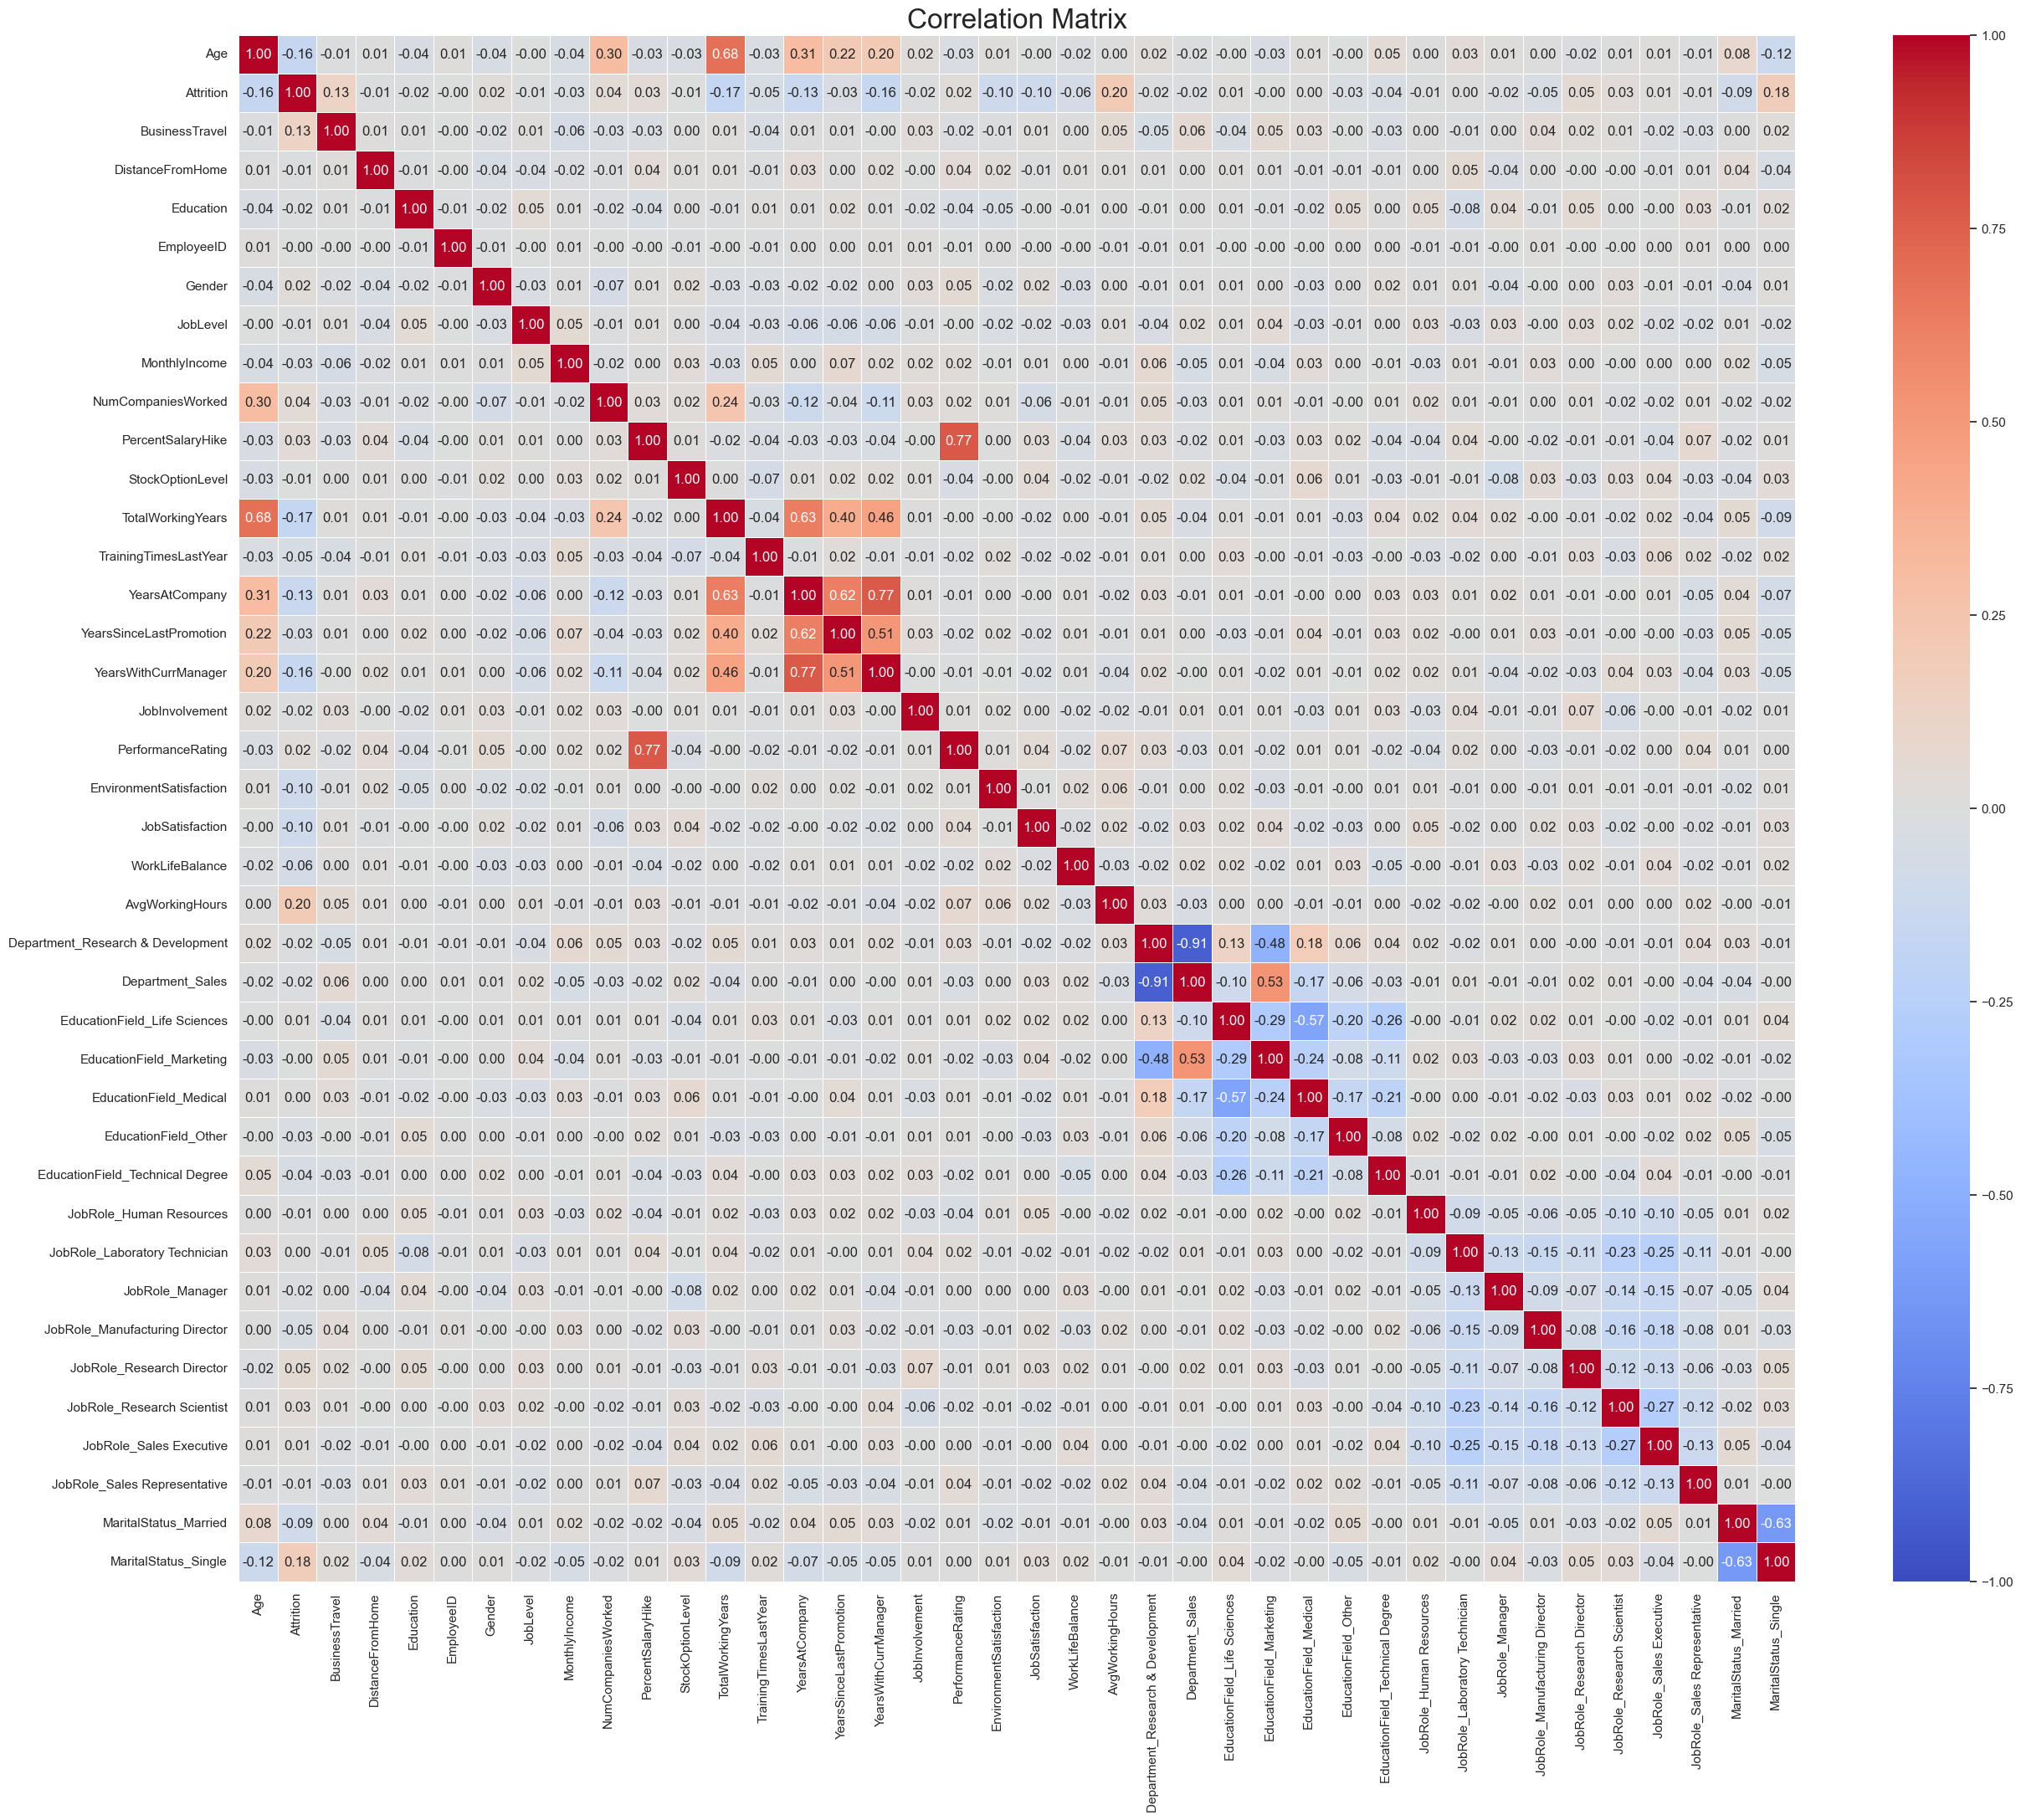

In [7]:
# Calculate correlation matrix
# Note: matplotlib and seaborn already imported in cell 3
corr_matrix = final_df.corr()

# Plot heatmap
plt.figure(figsize=(30, 24)) 
sns.heatmap(corr_matrix, 
            annot=True,       
            fmt=".2f",        
            cmap="coolwarm",  
            linewidths=0.5,   
            vmin=-1, vmax=1)  

plt.title("Correlation Matrix", fontsize=24)
plt.show()

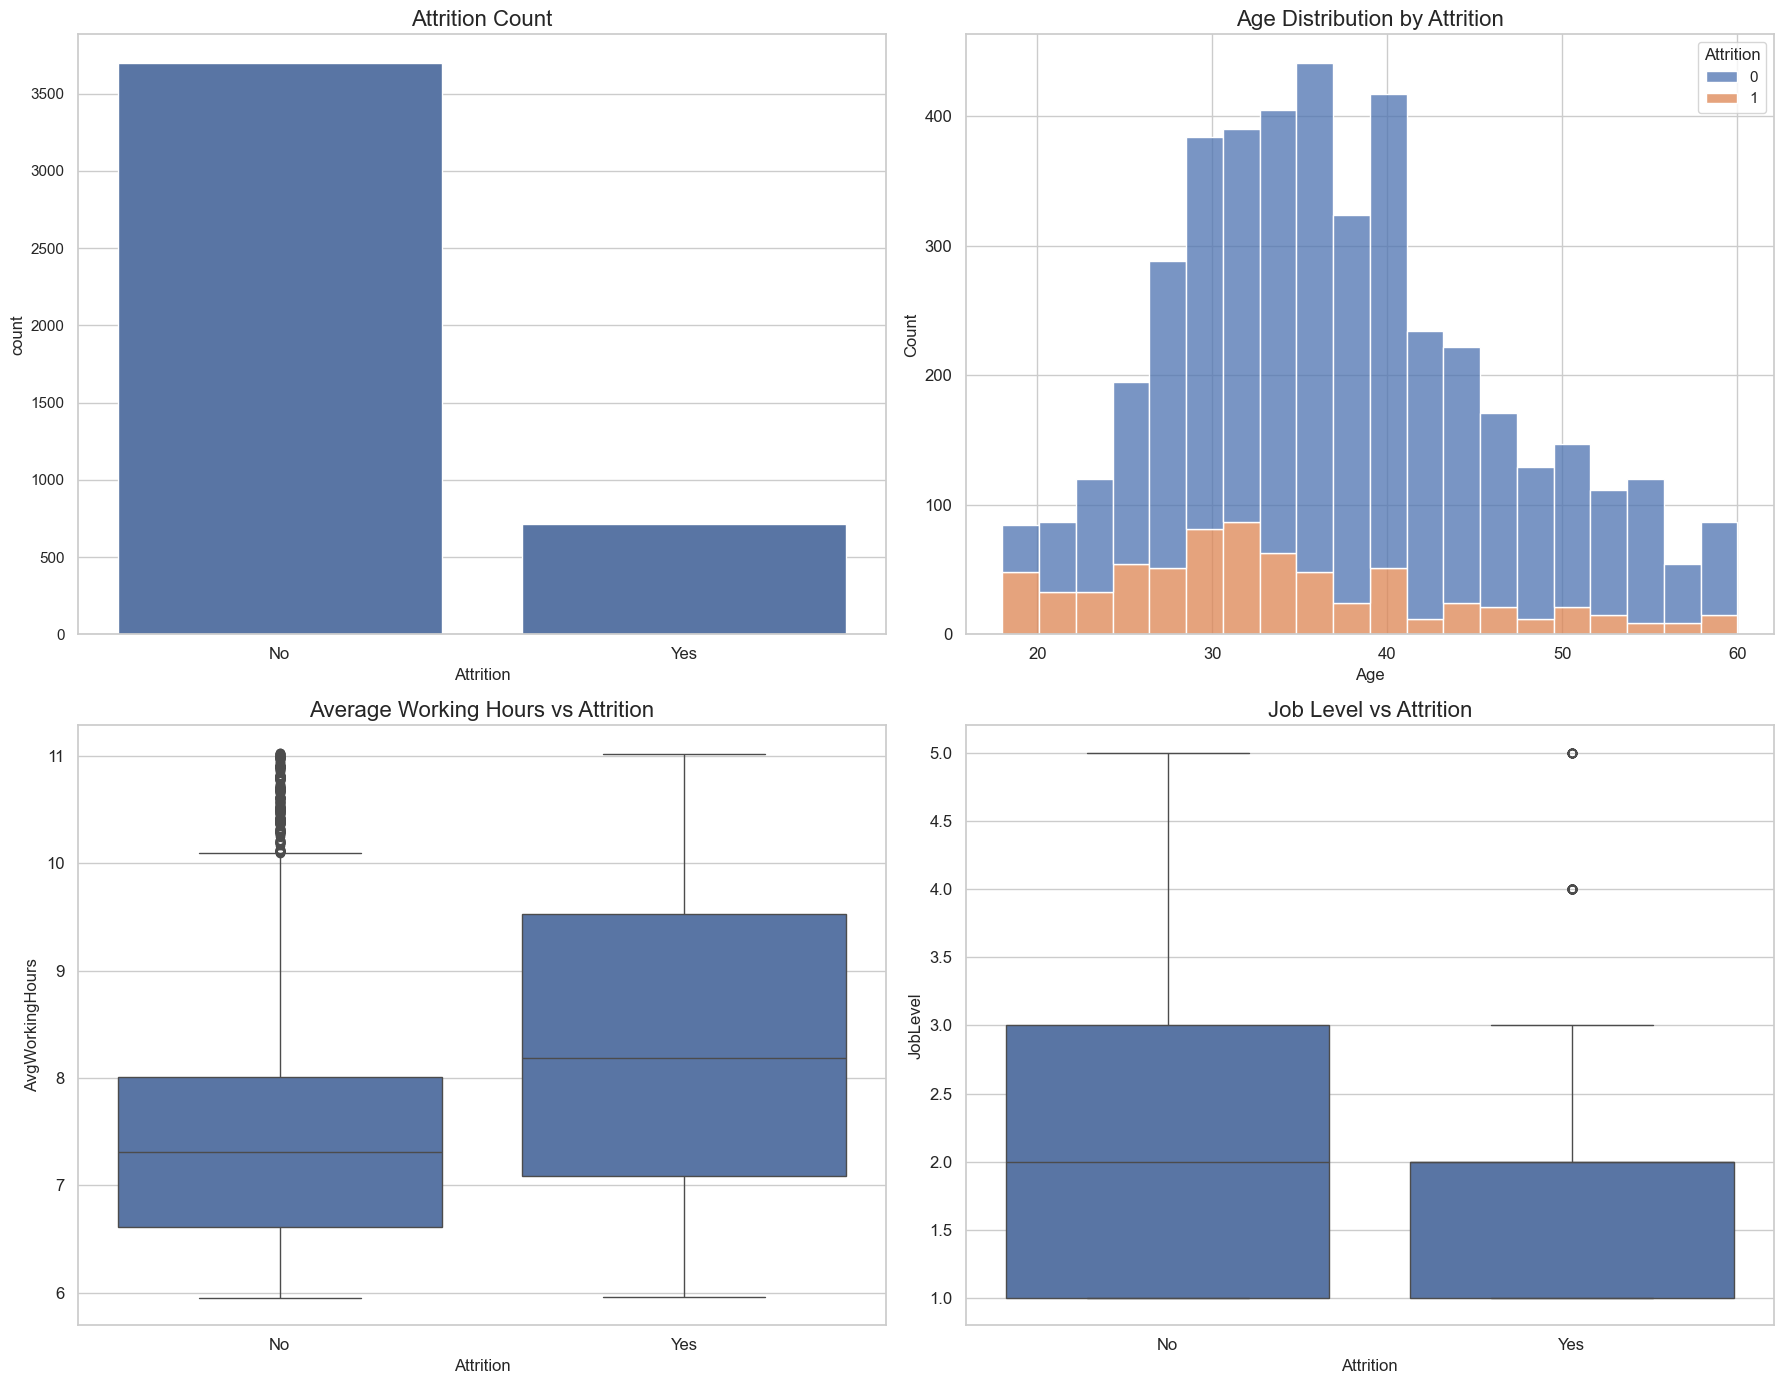

In [8]:
# Basic visualizations of attrition and key features

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Attrition count
sns.countplot(data=final_df, x='Attrition', ax=axes[0, 0])
axes[0, 0].set_title('Attrition Count', fontsize=16)
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['No', 'Yes'], fontsize=12)

# 2. Age distribution by attrition
sns.histplot(data=final_df, x='Age', hue='Attrition', multiple='stack', bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Attrition', fontsize=16)
axes[0, 1].tick_params(labelsize=12)

# 3. Average working hours by attrition
sns.boxplot(data=final_df, x='Attrition', y='AvgWorkingHours', ax=axes[1, 0])
axes[1, 0].set_title('Average Working Hours vs Attrition', fontsize=16)
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['No', 'Yes'], fontsize=12)
axes[1, 0].tick_params(labelsize=12)

# 4. JobLevel vs attrition
sns.boxplot(data=final_df, x='Attrition', y='JobLevel', ax=axes[1, 1])
axes[1, 1].set_title('Job Level vs Attrition', fontsize=16)
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['No', 'Yes'], fontsize=12)
axes[1, 1].tick_params(labelsize=12)

plt.tight_layout()
plt.show()


In [9]:
final_df.to_csv(os.path.join('data', 'final_data_processed.csv'), index=False)

In [10]:
target_col = 'Attrition'

# Attrition is already encoded (0/1) from earlier steps
X_full = df_full.drop(columns=[target_col])
y = df_full[target_col]

X_ethical = df_ethical.drop(columns=[target_col])

# Train/test split BEFORE scaling
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

X_train_eth, X_test_eth, y_train_eth, y_test_eth = train_test_split(
    X_ethical, y, test_size=0.2, random_state=42, stratify=y
)

print("Data standardization completed.")
print(f"Full features - scaled train/test: {X_train_full.shape}, {X_test_full.shape}")
print(f"Ethical features - scaled train/test: {X_train_eth.shape}, {X_test_eth.shape}")

Data standardization completed.
Full features - scaled train/test: (3528, 39), (882, 39)
Ethical features - scaled train/test: (3528, 28), (882, 28)


## Model

## Models with and without ethical constraints

We compare several models on:
- A full feature set (no ethical filtering)
- An ethical feature set (sensitive variables removed: EmployeeID, Gender, MaritalStatus, Education, EducationField, NumCompaniesWorked)

Models tested: Random Forest, Decision Tree, Naive Bayes, SVM


In [11]:
def evaluate_models(X_train, X_test, y_train, y_test, label):
    models = {
        'logistic_regresion': LogisticRegression(),
        'perceptron': Perceptron(),
        'random_forest': RandomForestClassifier(n_estimators=200, random_state=42),
        'decision_tree': DecisionTreeClassifier(random_state=42),
        'naive_bayes': GaussianNB(),
        'svm': SVC(probability=True)
    }

    print("\n" + "=" * 80)
    print(f"Results for feature set: {label}")
    print("=" * 80)

    trained_models = {}
    
    for name, model in models.items():
        print(f"\n--- {name} ---")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_proba)
        else:
            auc = None

        print("Classification report:")
        print(classification_report(y_test, y_pred, digits=3))

        print("Confusion matrix:")
        print(confusion_matrix(y_test, y_pred))

        if auc is not None:
            print(f"ROC-AUC: {auc:.3f}")

        trained_models[name] = model

    return trained_models


# Evaluate on ethical feature set (using scaled data)
models_eth = evaluate_models(X_train_eth, X_test_eth, y_train_eth, y_test_eth, label='Ethical features')

# Evaluate on full feature set (using scaled data)
models_full = evaluate_models(X_train_full, X_test_full, y_train_full, y_test_full, label='Full features')



Results for feature set: Ethical features

--- logistic_regresion ---
Classification report:
              precision    recall  f1-score   support

           0      0.858     0.974     0.913       740
           1      0.548     0.162     0.250       142

    accuracy                          0.844       882
   macro avg      0.703     0.568     0.581       882
weighted avg      0.808     0.844     0.806       882

Confusion matrix:
[[721  19]
 [119  23]]
ROC-AUC: 0.778

--- perceptron ---
Classification report:
              precision    recall  f1-score   support

           0      0.874     0.916     0.894       740
           1      0.415     0.310     0.355       142

    accuracy                          0.819       882
   macro avg      0.644     0.613     0.625       882
weighted avg      0.800     0.819     0.808       882

Confusion matrix:
[[678  62]
 [ 98  44]]

--- random_forest ---
Classification report:
              precision    recall  f1-score   support

           

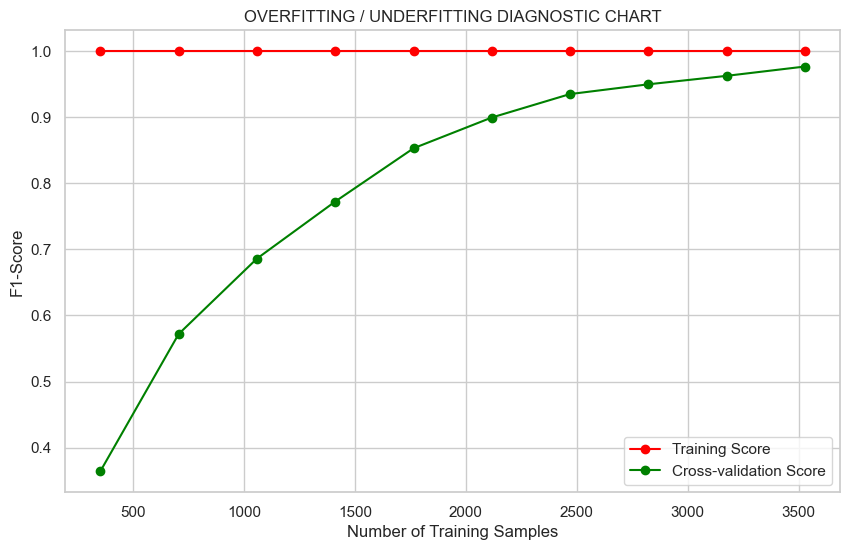

In [12]:
from sklearn.model_selection import cross_val_score, learning_curve, StratifiedKFold

# 1. Initialize K-Fold (splitting data into 5 equal parts)
# Using StratifiedKFold ensures the class ratio (Attrition Yes/No) is preserved in each fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Select the best model (Random Forest is typically the strongest for this project)
rf_check = RandomForestClassifier(n_estimators=200, random_state=42)

# 3. Calculate Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_check, X_ethical, y, cv=skf, scoring='f1', n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# 4. Plot the Learning Curve
plt.figure(figsize=(10, 6))

# Plot Training Score (Red)
plt.plot(train_sizes, train_mean, 'o-', color="red", label="Training Score")

# Plot Cross-Validation Score (Green)
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation Score")

plt.title("OVERFITTING / UNDERFITTING DIAGNOSTIC CHART")
plt.xlabel("Number of Training Samples")
plt.ylabel("F1-Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## ROC-AUC curves

We visualize ROC curves for all models on both ethical and full feature sets.


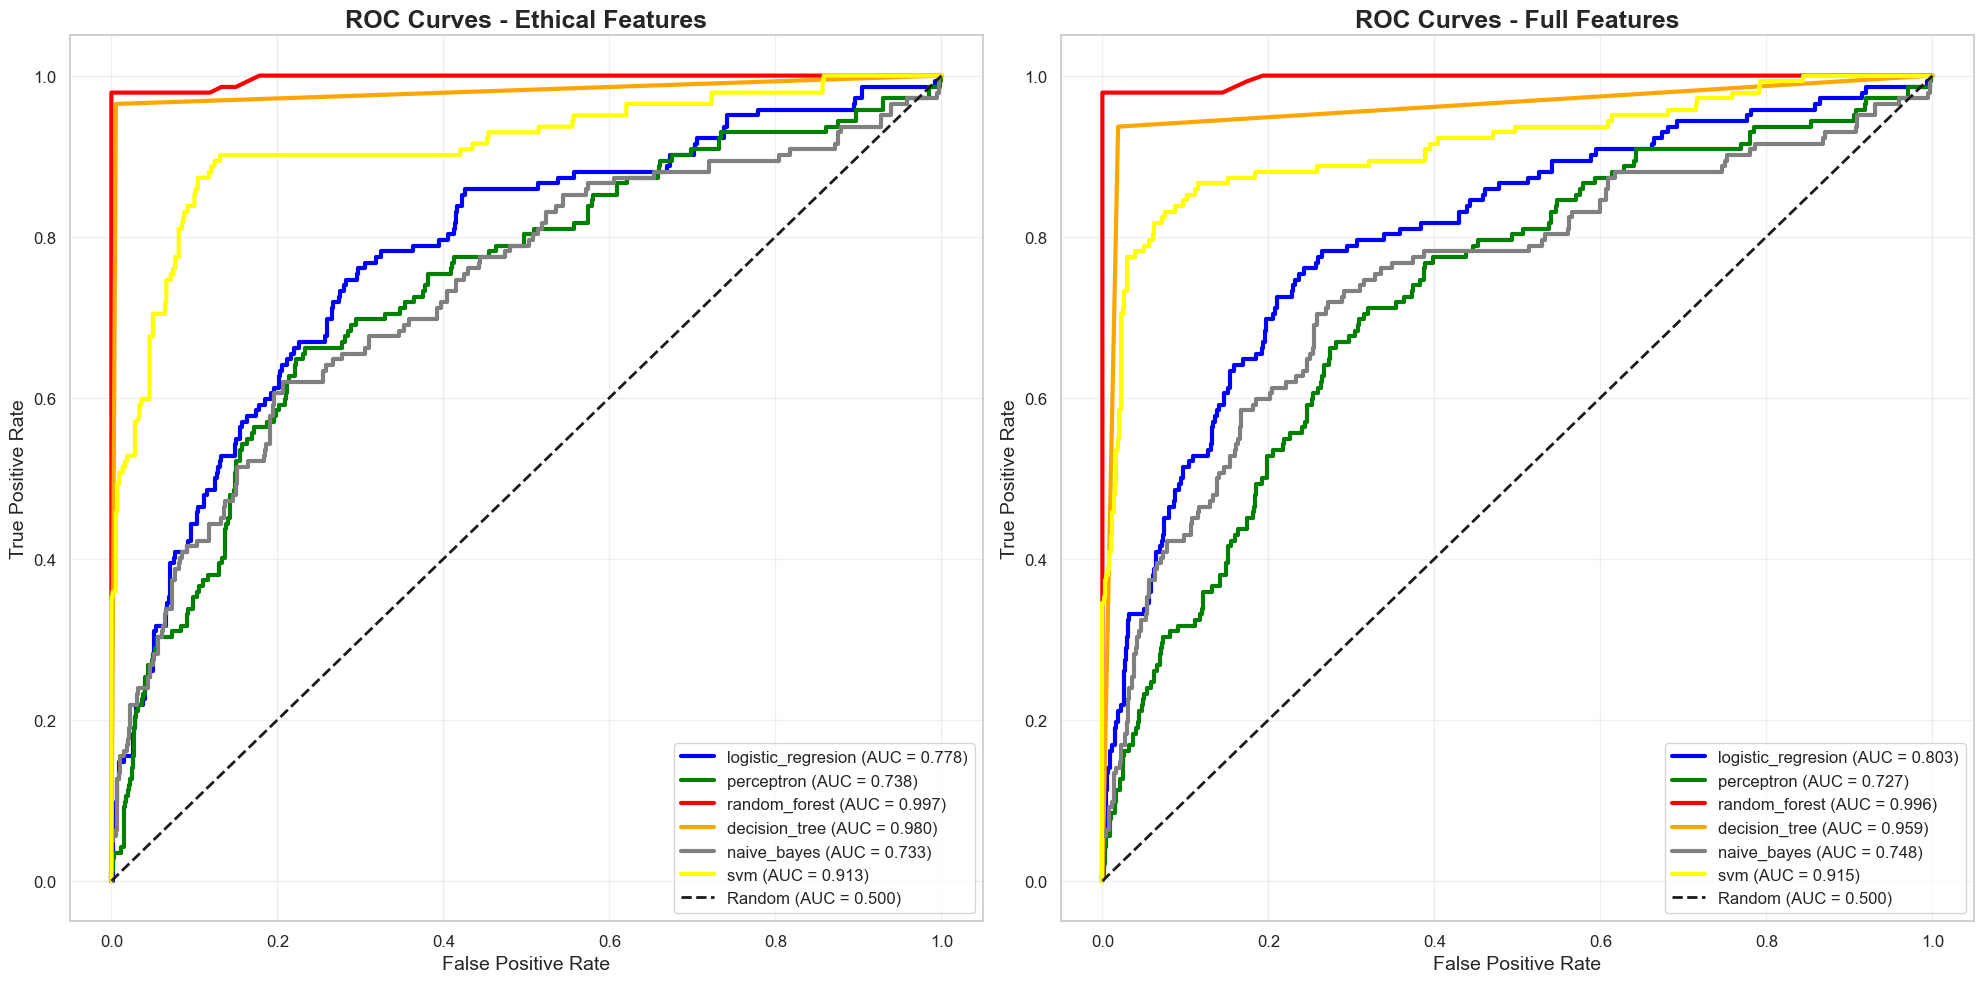

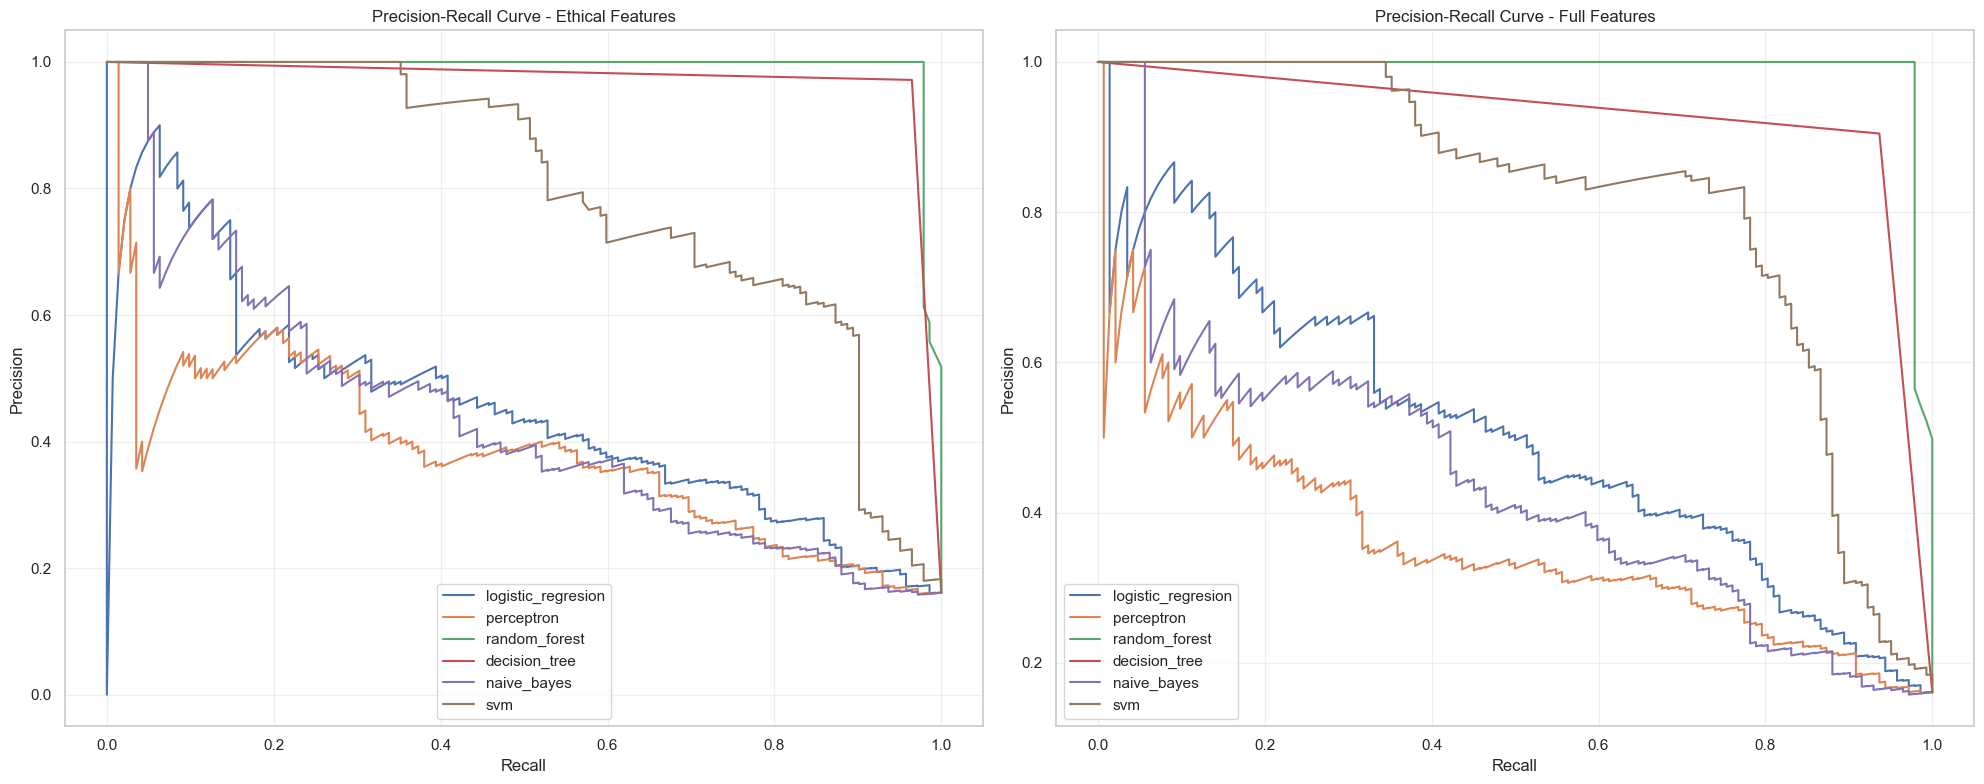

In [13]:

from sklearn.metrics import precision_recall_curve
# Plot ROC curves for all models

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

model_names = ['logistic_regresion', 'perceptron', 'random_forest', 'decision_tree', 'naive_bayes', 'svm']
colors = ['blue', 'green', 'red', 'orange', 'grey', 'yellow']

# Ethical features
for i, name in enumerate(model_names):
    if name in models_eth:
        model = models_eth[name]
        if name == 'perceptron':
            y_proba = model.decision_function(X_test_eth)
        else:
            y_proba = model.predict_proba(X_test_eth)[:, 1]

        fpr, tpr, _ = roc_curve(y_test_eth, y_proba)
        auc = roc_auc_score(y_test_eth, y_proba)
        axes[0].plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})", color=colors[i], linewidth=3)

axes[0].plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)', linewidth=2)
axes[0].set_title('ROC Curves - Ethical Features', fontsize=18, fontweight='bold')
axes[0].set_xlabel('False Positive Rate', fontsize=14)
axes[0].set_ylabel('True Positive Rate', fontsize=14)
axes[0].legend(loc='lower right', fontsize=12)
axes[0].tick_params(labelsize=12)
axes[0].grid(True, alpha=0.3)

# Full features
for i, name in enumerate(model_names):
    if name in models_full:
        model = models_full[name]
        if name == 'perceptron':
            y_proba = model.decision_function(X_test_full)
        else:
            y_proba = model.predict_proba(X_test_full)[:, 1]
            
        fpr, tpr, _ = roc_curve(y_test_full, y_proba)
        auc = roc_auc_score(y_test_full, y_proba)
        axes[1].plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})", color=colors[i], linewidth=3)

axes[1].plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)', linewidth=2)
axes[1].set_title('ROC Curves - Full Features', fontsize=18, fontweight='bold')
axes[1].set_xlabel('False Positive Rate', fontsize=14)
axes[1].set_ylabel('True Positive Rate', fontsize=14)
axes[1].legend(loc='lower right', fontsize=12)
axes[1].tick_params(labelsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Drawing Precision-Recall curves for both ethical and full feature sets
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Ethical features
for name in model_names:
    if name in models_eth:
        model = models_eth[name]
        if name == 'perceptron':
            y_proba = model.decision_function(X_test_eth)
        else:
            y_proba = model.predict_proba(X_test_eth)[:, 1]

        precision, recall, _ = precision_recall_curve(y_test_eth, y_proba)
        axes[0].plot(recall, precision, label=name)

axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision-Recall Curve - Ethical Features')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Full features
for name in model_names:
    if name in models_full:
        model = models_full[name]
        if name == 'perceptron':
            y_proba = model.decision_function(X_test_full)
        else:
            y_proba = model.predict_proba(X_test_full)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test_full, y_proba)
        axes[1].plot(recall, precision, label=name)

axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve - Full Features')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Observation

We analyze the most important factors associated with attrition using feature importance from the Random Forest model.


Top 15 Most Important Features for Attrition Prediction (Ethical Model):


,Feature,Importance,MeanDiff
0,AvgWorkingHours,0.127476,0.548456
1,Age,0.093867,-0.432931
2,TotalWorkingYears,0.083816,-0.462589
3,MonthlyIncome,0.082041,-0.084779
4,YearsAtCompany,0.065239,-0.365457
5,DistanceFromHome,0.059920,-0.026459
6,PercentSalaryHike,0.050414,0.088467
7,YearsWithCurrManager,0.047283,-0.424757
8,EnvironmentSatisfaction,0.042381,-0.276815
9,TrainingTimesLastYear,0.035626,-0.134418


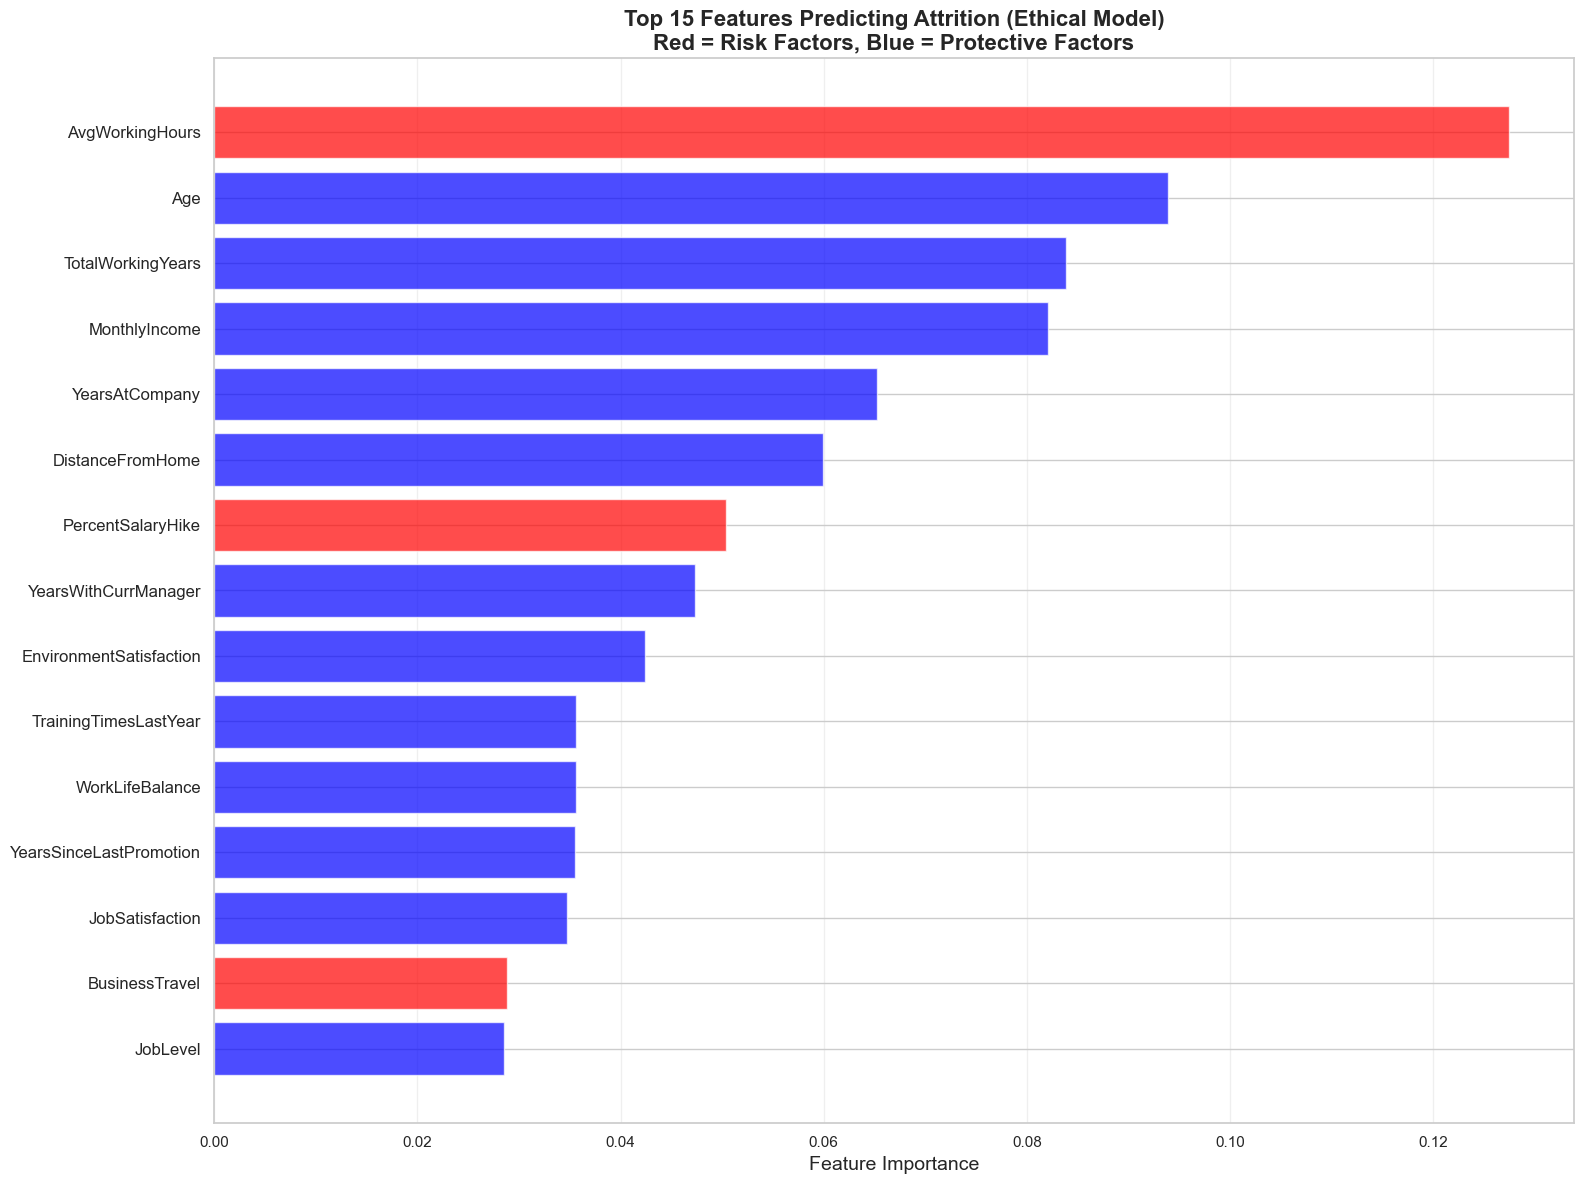

 RED bars: Risk factors - Higher values associated with increased risk of attrition
 BLUE bars: Protective factors - Higher values associated with reduced risk of attrition


In [14]:
# Feature importance analysis using Random Forest
rf_model = models_eth['random_forest']
feature_importance = pd.DataFrame({
    'Feature': X_ethical.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Calculate mean difference between leavers (Attrition=1) and stayers (Attrition=0)
# Positive difference = higher for leavers = risk factor (red)
# Negative difference = lower for leavers = protective factor (blue)
group_means = df_ethical.groupby('Attrition').mean(numeric_only=True).T
mean_diff = group_means[1] - group_means[0]  # leavers - stayers

# Merge importance with mean difference
feature_importance = feature_importance.merge(
    mean_diff.reset_index().rename(columns={'index': 'Feature', 0: 'MeanDiff'}),
    on='Feature',
    how='left'
)

# Display top 15 features
print("Top 15 Most Important Features for Attrition Prediction (Ethical Model):")
print("=" * 80)
display(feature_importance.head(15))

# Visualize top features with color coding
plt.figure(figsize=(16, 12))
top_features = feature_importance.head(15)

# Color bars: red for risk factors (positive diff), blue for protective factors (negative diff)
colors = ['red' if diff > 0 else 'blue' for diff in top_features['MeanDiff']]

plt.barh(range(len(top_features)), top_features['Importance'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'], fontsize=12)
plt.xlabel('Feature Importance', fontsize=14)
plt.title('Top 15 Features Predicting Attrition (Ethical Model)\nRed = Risk Factors, Blue = Protective Factors', 
          fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


print(" RED bars: Risk factors - Higher values associated with increased risk of attrition")
print(" BLUE bars: Protective factors - Higher values associated with reduced risk of attrition")
